In [1]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:02<00:01, 9.54MB/s]
100% 66.0M/66.0M [00:02<00:00, 25.8MB/s]


In [3]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [35]:
import pandas as pd
credit=pd.read_csv("/content/creditcard.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
import numpy as np
credit.iloc[:,:30]=credit.astype(np.float32)
credit.Class=credit.Class.astype(np.int8)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [37]:
credit.Class=credit.Class.map({0:1,1:-1})

In [38]:
credit.Class

0         1
1         1
2         1
3         1
4         1
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: Class, Length: 284807, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split 
train_set, test_set= train_test_split(credit, test_size=0.2, stratify=credit.Class)
print("train_set.shape: {}".format(train_set.shape))
print("test_set.shape: {}".format(test_set.shape))

train_set.shape: (227845, 31)
test_set.shape: (56962, 31)


In [41]:
credit = train_set.copy()
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
132448,79989.0,1.408894,-0.239359,0.038875,-0.533766,-0.853614,-1.700539,0.020236,-0.474608,-1.264687,0.670532,0.333233,-0.174798,0.524617,0.047961,0.328711,0.547661,0.573301,-1.836522,0.430503,0.082049,0.231996,0.623275,-0.105881,0.974298,0.738105,-0.119603,-0.025098,0.008604,15.00,1
101395,67819.0,-1.000411,-0.396331,1.269011,-0.687485,1.280296,0.532867,-0.074210,0.611021,0.551822,-1.114338,-0.093886,0.505243,-1.017486,-0.087008,-0.649749,-1.131481,0.731408,-2.535311,-3.153301,-0.349095,0.265817,0.842541,0.326925,-0.628029,-1.163393,0.006286,0.213278,0.218550,11.75,1
34728,37798.0,1.084504,0.652846,0.406435,2.892367,-0.099140,-0.192943,-0.075138,0.118625,-0.514225,0.065957,1.304446,0.580703,-0.432255,-1.493382,-1.444839,0.729029,0.866072,0.591656,-0.632478,-0.131041,-0.098747,-0.123525,-0.091379,0.414794,0.564311,0.048677,0.022550,0.045922,6.03,1
151228,95042.0,2.038863,0.169352,-0.802310,1.744040,0.571123,0.530587,-0.331155,-0.033575,0.433917,0.904498,1.222862,-1.782609,2.752341,1.373822,-1.990627,1.361355,-0.356348,-0.065314,-0.494393,-0.105978,-0.236879,-0.419515,0.273779,0.137179,-0.533029,2.087645,-0.223749,-0.091872,0.72,1
52710,45601.0,-1.141469,1.386395,0.896819,-0.219310,-0.477649,0.620340,-1.287173,-1.945651,-0.744462,-1.030524,0.125805,0.511590,-0.414890,0.927859,0.309786,1.193871,-0.767400,0.955869,0.269118,0.481070,-1.181978,0.422232,0.183457,-0.526605,-0.716915,0.121662,-0.023623,0.120014,12.72,1


In [43]:
credit.Class.value_counts(normalize=True)

 1    0.998271
-1    0.001729
Name: Class, dtype: float64

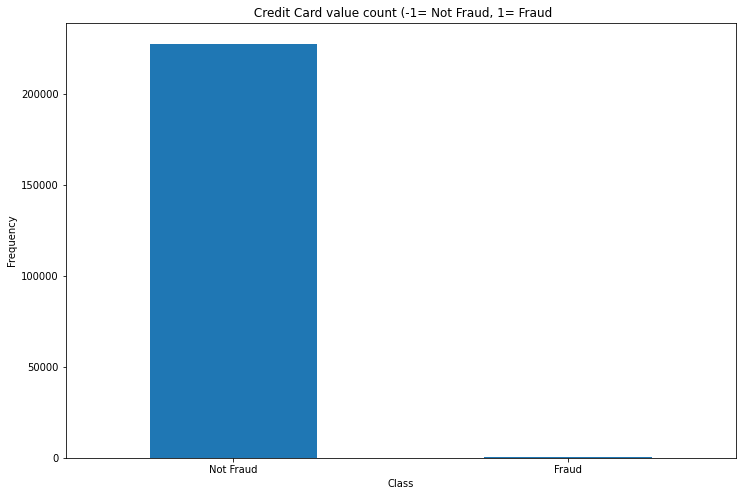

In [44]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(12,8))
credit.Class.value_counts().plot.bar(rot=0)
plt.title(" Credit Card value count (-1= Not Fraud, 1= Fraud")
plt.xticks(range(2), ['Not Fraud', 'Fraud'])
plt.ylabel('Frequency')
plt.xlabel("Class")
plt.show()

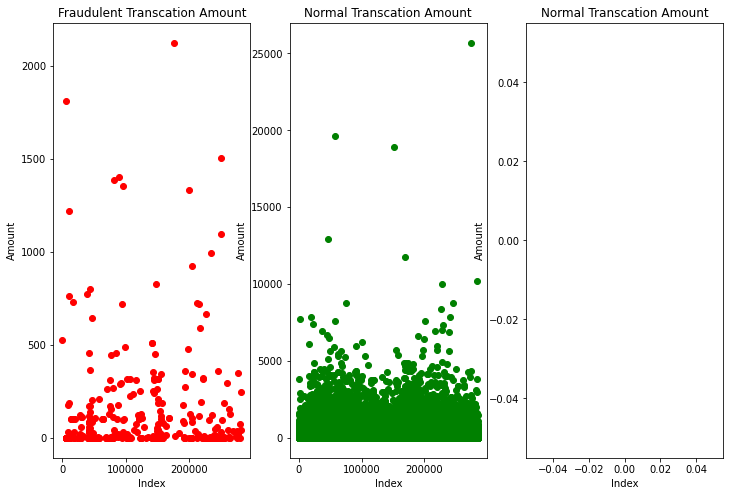

In [50]:
fig, ax= plt.subplots(1,2,figsize=(12,8))
fraud=credit.Class == -1
normal=credit.Class ==1

ax[0].scatter(credit[fraud].index, credit[fraud].Amount, c='r')
ax[0].set_xlabel('Index')
ax[0].set_ylabel("Amount")
ax[0].set_title("Fraudulent Transcation Amount")

ax[1].scatter(credit[normal].index, credit[normal].Amount, c='g')
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Amount")
ax[1].set_title("Normal Transcation Amount")

plt.show()

In [51]:
zero_amount = credit[credit.Amount==0]
non_zero_amount = credit[credit.Amount!=0]

In [54]:
df1= zero_amount.groupby('Class').size().reset_index(name='counts')
df2=non_zero_amount.groupby('Class').size().reset_index(name='counts')
df1_sum=df1.counts.sum()
df2_sum=df2.counts.sum()

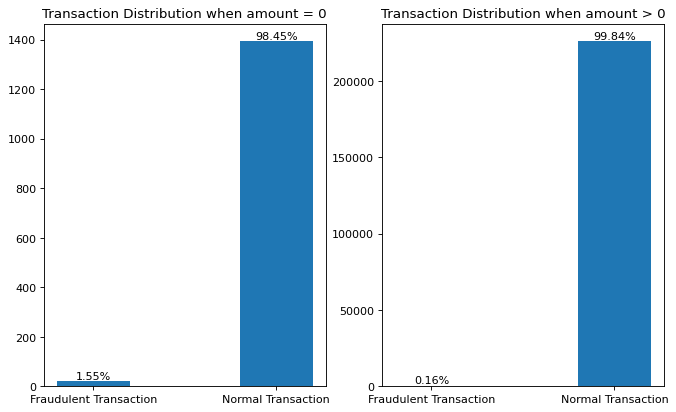

In [64]:
fig, axes=plt.subplots(1,2, figsize=(10,6), dpi=80)
axes[0].bar(df1['Class'], df1['counts'])
for i,val in zip([-1,1], df1.counts.values):
  axes[0].text(i,val,('{:.2f}%'.format(val/df1_sum*100)),horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500})

axes[1].bar(df2['Class'], df2['counts'])
for i,val in zip([-1,1], df2.counts.values):
  axes[1].text(i,val,('{:.2f}%'.format(val/df2_sum*100)),horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight': 500})
plt.sca(axes[0])
plt.xticks([-1, 1], ['Fraudulent Transaction', 'Normal Transaction'])
plt.sca(axes[1])
plt.xticks([-1, 1], ['Fraudulent Transaction', 'Normal Transaction'])
axes[0].set_title('Transaction Distribution when amount = 0')
axes[1].set_title('Transaction Distribution when amount > 0')
plt.show()

In [67]:
print(round(credit.corr(),2))

        Time    V1    V2    V3    V4  ...   V26   V27   V28  Amount  Class
Time    1.00  0.12 -0.01 -0.42 -0.10  ... -0.04 -0.00 -0.01   -0.01   0.01
V1      0.12  1.00  0.01 -0.00 -0.00  ...  0.00 -0.01 -0.00   -0.23   0.10
V2     -0.01  0.01  1.00  0.00 -0.00  ...  0.00 -0.01  0.00   -0.53  -0.09
V3     -0.42 -0.00  0.00  1.00 -0.00  ... -0.00 -0.01  0.00   -0.21   0.19
V4     -0.10 -0.00 -0.00 -0.00  1.00  ...  0.00  0.00  0.00    0.10  -0.14
V5      0.17 -0.00 -0.00  0.00 -0.00  ... -0.00 -0.01  0.01   -0.39   0.09
V6     -0.06 -0.00  0.00 -0.00 -0.00  ... -0.00  0.01 -0.00    0.22   0.04
V7      0.09 -0.00 -0.00 -0.00  0.00  ... -0.00  0.01 -0.01    0.40   0.19
V8     -0.04  0.01 -0.00  0.01 -0.00  ...  0.00  0.00  0.00   -0.11  -0.02
V9     -0.01 -0.00 -0.00  0.00  0.00  ...  0.00  0.00 -0.00   -0.04   0.10
V10     0.03 -0.00  0.00 -0.00 -0.00  ...  0.00  0.00  0.00   -0.10   0.22
V11    -0.25 -0.00 -0.00 -0.00  0.00  ... -0.00  0.00 -0.00    0.00  -0.16
V12     0.12 -0.00 -0.00 

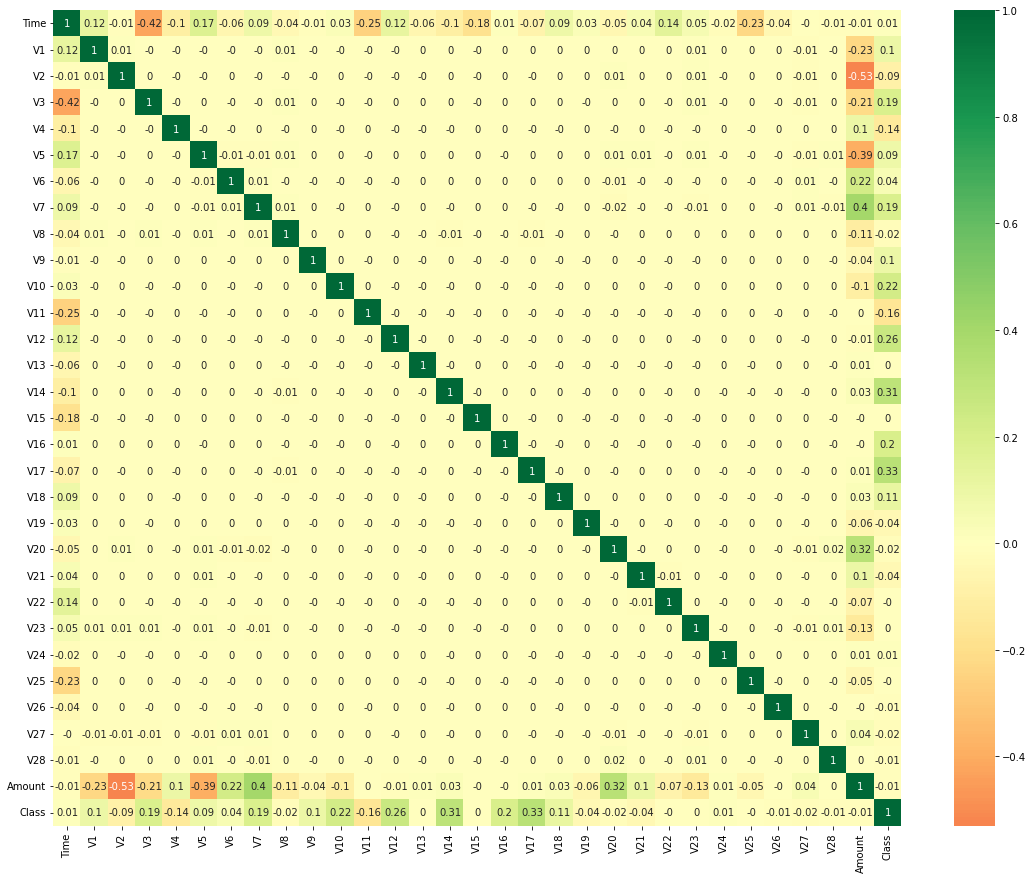

In [69]:
import seaborn as sns
f=plt.figure(figsize=(19,15))
sns.heatmap(round(credit.corr(),2), xticklabels=credit.corr().columns, yticklabels=credit.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

In [77]:
X = credit.drop('Class', axis=1)
y = credit.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182276, 30)
(45569, 30)
(182276,)
(45569,)


# **Imbalanced Learning**

In [84]:
class ClassifierSearchCV():
  def __init__(self, clf_params, cv=10, scoring='accuracy', n_jobs=1):
    self.clf_params=clf_params
    self.cv=cv
    self.scoring=scoring
    self.n_jobs=n_jobs
  
  def fit(self,X,y=None):
    return self
  def fitCV(self, X, y=None):
    self.X=X
    self.y=y
    self.model_scores={}

    for _,clf in self.clf_params.items():
      clf.fit(self.X, self.y)
      self.model_scores[clf]=cross_val_score(clf,self.X,self.y, cv=self.cv, n_jobs=self.n_jobs, scoring=self.scoring).mean()
    
    self.best_classifier= None
    best_score =0.0
    for clf, score in self.model_scores.items():
      if score >best_score:
        self.best_classifier=clf
        best_score=score

  #def show_plt(self):
    #for model_name, clf in self.clf_params.items():
   #   perd=None
     # scores=None

      #if 'decision_function' in 
  def show_plot(self):

        for model_name, clf in self.clf_params.items():
            pred = None
            scores = None
            
            if 'decision_function' in dir(clf):
                scores = clf.decision_function(self.X)
                pred = cross_val_predict(clf, self.X, self.y, cv=self.cv, n_jobs=-1)
                
            elif 'predict_proba' in dir(clf):
                scores = cross_val_predict(clf, self.X, self.y, cv=self.cv, n_jobs=-1, method='predict_proba')[:, 0]
                pred = cross_val_predict(clf, self.X, self.y, cv=self.cv, n_jobs=-1)
                
            evaluate_model(self.y, pred, scores, show_plot=True, model_name=model_name)

In [71]:
def evaluate_model(true, pred, scores=None, show_plot=True, model_name=""):
    
    if show_plot and scores is not None:
        # set up figure structure
        fig, ax = plt.subplots(1, 3, figsize=(10, 3))
        
        # plot precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(true, scores, pos_label=-1)
        ax[0].plot(thresholds, precisions[:-1], 'b', label='Precision')
        ax[0].plot(thresholds, recalls[:-1], 'g', label='Recall')
        ax[0].set_title('Precision and Recall Curve')
        ax[0].set_xlabel('Threshold')
        ax[0].legend(loc='best')
        
        # plot roc_curve
        fpr, tpr, thresholds = roc_curve(true, scores, pos_label=-1)
        ax[1].plot(fpr, tpr, 'b', lw=2)
        ax[1].plot([0, 1], [0, 1], 'k--')
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
        ax[1].set_title('ROC Curve')
        
        # plot confusion matrix
        c_m = confusion_matrix(true, pred)
        sns.heatmap(data=c_m, annot=True, ax=ax[2])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        labels = ['Anomaly', 'Normal']
        ax[2].set_xticklabels(labels)
        ax[2].set_yticklabels(labels)
        ax[2].set_title('Confusion Matrix')
        
        plt.show()
        
    print(f'Model Name: {model_name}')
    print(f'Precision Score: {precision_score(true, pred, pos_label=-1)}')
    print(f'Recall Score: {recall_score(true, pred, pos_label=-1)}')
    print(f'F1 Score: {f1_score(true, pred, pos_label=-1)}')
    print(f'ROC_AUC Score: {roc_auc_score(true, pred)}')
    print(f'\t\t\tClassification Report')
    print(classification_report(true, pred, target_names=['Anomaly', 'Normal']))

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_params = {
    'Forest': RandomForestClassifier(),
    'NB': GaussianNB()
}

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
smote_X_train, smote_y_train = SMOTE().fit_resample(X_train, y_train)
clf_search = ClassifierSearchCV(clf_params=clf_params, cv=3, n_jobs=-1, scoring='f1_micro')
clf_search.fitCV(smote_X_train, smote_y_train)
clf_search.best_classifier

RandomForestClassifier()

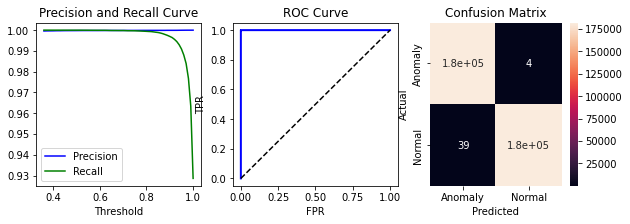

Model Name: Forest
Precision Score: 0.9997857095760346
Recall Score: 0.9999780172674364
F1 Score: 0.9998818541750811
ROC_AUC Score: 0.9998818428124707
			Classification Report
              precision    recall  f1-score   support

     Anomaly       1.00      1.00      1.00    181961
      Normal       1.00      1.00      1.00    181961

    accuracy                           1.00    363922
   macro avg       1.00      1.00      1.00    363922
weighted avg       1.00      1.00      1.00    363922



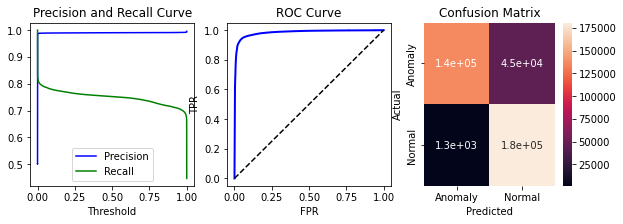

Model Name: NB
Precision Score: 0.9903550471394358
Recall Score: 0.7522161342265651
F1 Score: 0.8550136178506286
ROC_AUC Score: 0.8724451942998774
			Classification Report
              precision    recall  f1-score   support

     Anomaly       0.99      0.75      0.86    181961
      Normal       0.80      0.99      0.89    181961

    accuracy                           0.87    363922
   macro avg       0.90      0.87      0.87    363922
weighted avg       0.90      0.87      0.87    363922



In [86]:
clf_search.show_plot()

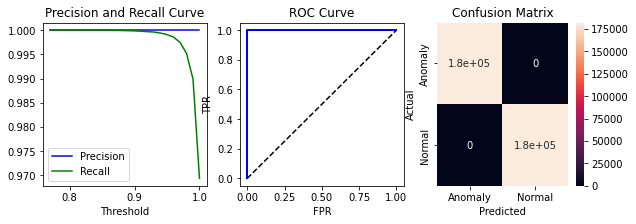

Model Name: Random Forest Classifier
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
ROC_AUC Score: 1.0
			Classification Report
              precision    recall  f1-score   support

     Anomaly       1.00      1.00      1.00    181961
      Normal       1.00      1.00      1.00    181961

    accuracy                           1.00    363922
   macro avg       1.00      1.00      1.00    363922
weighted avg       1.00      1.00      1.00    363922



In [87]:
model = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model.fit(smote_X_train, smote_y_train)
evaluate_model(model.predict(smote_X_train), smote_y_train, model.predict_proba(smote_X_train)[:, 0], True, 'Random Forest Classifier')

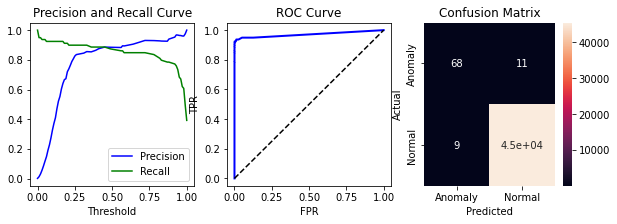

Model Name: Random Forest Classifier
Precision Score: 0.8831168831168831
Recall Score: 0.8607594936708861
F1 Score: 0.8717948717948718
ROC_AUC Score: 0.9302808239952585
			Classification Report
              precision    recall  f1-score   support

     Anomaly       0.88      0.86      0.87        79
      Normal       1.00      1.00      1.00     45490

    accuracy                           1.00     45569
   macro avg       0.94      0.93      0.94     45569
weighted avg       1.00      1.00      1.00     45569



In [88]:
predictions = model.predict(X_test)
scores = model.predict_proba(X_test)[:, 0]
evaluate_model(y_test, predictions, scores, show_plot=True, model_name='Random Forest Classifier')

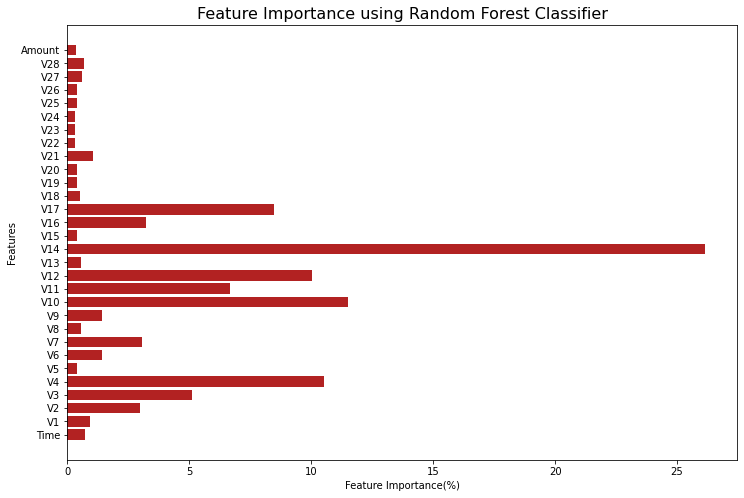

In [92]:

columns = smote_X_train.columns
feat_imp = model.feature_importances_ * 100

fig, ax = plt.subplots(figsize=(12, 8))
plt.barh(columns, feat_imp, color='firebrick')
#ax.xaxis.set_major_formatter(label_format)
ax.set_xlabel('Feature Importance(%)')
ax.set_ylabel('Features')
ax.set_title('Feature Importance using Random Forest Classifier', fontsize=16)
plt.show()

In [93]:
cutoff = .05
selected_features = []
columns = smote_X_train.columns
feat_imp = model.feature_importances_

for c, f in zip(columns, feat_imp):
    if f > cutoff:
        selected_features.append(c)
        
selected_features

['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V17']

In [94]:
features = smote_X_train[selected_features]
labels = smote_y_train
features.head()

,V3,V4,V10,V11,V12,V14,V17
0,0.528646,-2.056672,-1.513859,1.224229,2.021647,-0.142775,-0.428282
1,-0.505133,-0.101752,-0.890969,-1.616163,-0.737806,-1.122894,0.301856
2,0.777378,-0.771130,-0.687166,1.096974,-2.548153,1.362131,0.265690
3,-1.728286,0.406326,-0.372991,-0.643935,0.040591,-0.814645,0.463550
4,1.644752,0.526859,-0.558243,-0.671654,-0.204450,0.376222,-0.590750


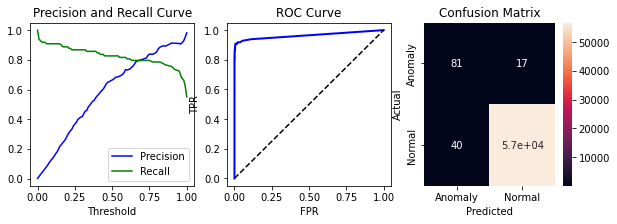

Model Name: Random Forest Classifier
Precision Score: 0.6694214876033058
Recall Score: 0.826530612244898
F1 Score: 0.7397260273972602
ROC_AUC Score: 0.9129135897465346
			Classification Report
              precision    recall  f1-score   support

     Anomaly       0.67      0.83      0.74        98
      Normal       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.83      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [95]:
model.fit(features, labels) 
test_X = test_set.drop('Class', axis=1)[selected_features]
test_y = test_set.Class

pred_prob = model.predict_proba(test_X)[:, 0]
predictions = model.predict(test_X)
evaluate_model(test_y, predictions, pred_prob, show_plot=True, model_name='Random Forest Classifier')